In [71]:
import pandas
import numpy
import matplotlib.pyplot as plt
from utils.learn_novelty_detection_ensemble import ColumnName
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
import seaborn

In [7]:
dataframe_full = pandas.read_csv("/home/smohan/SAIL-ON/hydra/data/science_birds/novelty_detection/dataset_May2022/ensemble_learning_simple_levels_may2022.csv")
# feature_cols=['ColumnName.NUM_OBJECTS',
#     'ColumnName.HAS_NOVEL_OBJECT',
#  'ColumnName.MAX_REWARD_DIFFERENCE',
#  'ColumnName.AVG_REWARD_DIFFERENCE',
#  'ColumnName.MAX_PDDL_INCONSISTENCY',
#  'ColumnName.AVG_PDDL_INCONSISTENCY']

feature_cols=['ColumnName.HAS_NOVEL_OBJECT',
 'ColumnName.MAX_REWARD_DIFFERENCE',
 'ColumnName.AVG_REWARD_DIFFERENCE',
 'ColumnName.MAX_PDDL_INCONSISTENCY',
 'ColumnName.AVG_PDDL_INCONSISTENCY',
 'ColumnName.PASS']


dataframe_non_novelty = dataframe_full[dataframe_full['ColumnName.LEVEL'] == 0]
dataframe_phaseI_novelty = dataframe_full[(dataframe_full['ColumnName.LEVEL'] < 10) & (dataframe_full['ColumnName.LEVEL'] > 0)]
dataframe_phaseII_novelty = dataframe_full[dataframe_full['ColumnName.LEVEL'] > 10]



In [8]:
dataframe_full

,Unnamed: 0,ColumnName.LEVEL,ColumnName.TYPE,ColumnName.NUM_OBJECTS,ColumnName.HAS_NOVEL_OBJECT,ColumnName.MAX_REWARD_DIFFERENCE,ColumnName.AVG_REWARD_DIFFERENCE,ColumnName.MAX_PDDL_INCONSISTENCY,ColumnName.AVG_PDDL_INCONSISTENCY,ColumnName.GROUND_TRUTH,ColumnName.PASS
0,0,0,247,12,0,0.547124,0.547124,35.125359,35.125359,0,0.0
1,1,0,247,8,0,0.608974,0.608974,0.000000,0.000000,0,1.0
2,2,0,247,8,1,0.461214,0.461214,1000.000000,1000.000000,0,0.0
3,3,0,247,9,0,0.376372,0.376372,0.000000,0.000000,0,1.0
4,4,0,247,12,1,0.465131,0.465131,1000.000000,1000.000000,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
595,595,0,236,12,0,0.394727,0.394727,50.000000,50.000000,0,0.0
596,596,0,236,9,0,0.452896,0.452896,0.000000,0.000000,0,0.0
597,597,0,236,9,0,0.077887,0.077887,0.000000,0.000000,0,1.0
598,598,0,236,11,0,0.620848,0.620848,50.000000,50.000000,0,0.0


In [9]:
X2 = dataframe_full[feature_cols]
y2 = dataframe_full['ColumnName.GROUND_TRUTH']
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.10)


logreg2 = LogisticRegression()
logreg2.fit(X_train2,y_train2)
y_pred2_log=logreg2.predict(X_test2)
report2_log = classification_report(y_test2, y_pred2_log)
print(report2_log)

rf2 = RandomForestClassifier(n_estimators=20)
rf2.fit(X_train2,y_train2)
y_pred2_rf=rf2.predict(X_test2)
report2_rf = classification_report(y_test2, y_pred2_rf)
print(report2_rf)

ab2 = AdaBoostClassifier(n_estimators=100)
ab2.fit(X_train2,y_train2)
y_pred2_ab=ab2.predict(X_test2)
report2_ab = classification_report(y_test2, y_pred2_ab)
print(report2_ab)

/home/smohan/anaconda3/envs/hydra/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/smohan/anaconda3/envs/hydra/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/smohan/anaconda3/envs/hydra/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetr

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       0.00      0.00      0.00        14

    accuracy                           0.77        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.59      0.77      0.67        60

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        46
           1       0.40      0.43      0.41        14

    accuracy                           0.72        60
   macro avg       0.61      0.62      0.61        60
weighted avg       0.72      0.72      0.72        60

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        46
           1       0.57      0.29      0.38        14

    accuracy                           0.78        60
   macro avg       0.69      0.61      0.62        60
weighted avg       0.76      0.78      0.75        60



In [58]:
dataframe3 = dataframe_non_novelty.append(dataframe_phaseII_novelty, ignore_index=True)
X3 = dataframe3[feature_cols]
y3 = dataframe3['ColumnName.GROUND_TRUTH']
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y3,test_size=0.20)


logreg3 = LogisticRegression()
logreg3.fit(X_train3,y_train3)
y_pred3_log=logreg3.predict(X_test3)
report3_log = classification_report(y_test3, y_pred3_log)
print(report3_log)


rf3 = RandomForestClassifier(n_estimators=30)
rf3.fit(X_train3,y_train3)
y_pred3_rf=rf3.predict(X_test3)
report3_rf = classification_report(y_test3, y_pred3_rf)
print(report3_rf)

ab3 = AdaBoostClassifier(n_estimators=100)
ab3.fit(X_train3,y_train3)
y_pred3_ab=ab3.predict(X_test3)
report3_ab = classification_report(y_test3, y_pred3_ab)
print(report3_ab)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82        90
           1       0.59      0.57      0.58        40

    accuracy                           0.75       130
   macro avg       0.70      0.70      0.70       130
weighted avg       0.74      0.75      0.75       130

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        90
           1       0.77      0.60      0.68        40

    accuracy                           0.82       130
   macro avg       0.81      0.76      0.78       130
weighted avg       0.82      0.82      0.82       130

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        90
           1       0.70      0.53      0.60        40

    accuracy                           0.78       130
   macro avg       0.76      0.71      0.73       130
weighted avg       0.78      0.78      0.77       130



In [44]:
dataframe = pandas.read_csv("/home/smohan/SAIL-ON/hydra/data/science_birds/novelty_detection/ensemble_learning_all_levels.csv")
dataframe_phaseII_novelty = dataframe[dataframe['ColumnName.LEVEL'] > 10]
dataframe_phaseI_novelty_and_non = dataframe[dataframe['ColumnName.LEVEL'] < 10]
df_1 = dataframe_phaseII_novelty.sample(frac = 0.5)
df_final_validation = dataframe_phaseII_novelty.drop(df_1.index)

In [45]:
dataframe_final_training = dataframe_phaseI_novelty_and_non.append(df_1, ignore_index=True)

In [46]:
dataframe_validation = dataframe_phaseII_novelty.sample(frac=0.5)
dataframe_remainder = dataframe_phaseII_novelty.drop(dataframe_validation.index)

dataframe_final_training = dataframe_non_novelty.append(dataframe_phaseI_novelty, ignore_index=True)
dataframe_final_training = dataframe_final_training.append(dataframe_remainder, ignore_index=True)

In [47]:
X_final = dataframe_final_training[feature_cols]
y_final = dataframe_final_training['ColumnName.GROUND_TRUTH']
X_train_f,X_test_f,y_train_f,y_test_f=train_test_split(X_final, y_final,test_size=0.20)
rf_final = RandomForestClassifier(n_estimators=20)
rf_final.fit(X_train_f,y_train_f)
y_pred_f_rf=rf_final.predict(X_test_f)
report_f_rf = classification_report(y_test_f, y_pred_f_rf)
print(report_f_rf)

              precision    recall  f1-score   support

           0       0.62      0.63      0.63        84
           1       0.79      0.78      0.78       146

    accuracy                           0.73       230
   macro avg       0.70      0.71      0.71       230
weighted avg       0.73      0.73      0.73       230



In [19]:
rf_final_full = RandomForestClassifier(n_estimators=20)
rf_final_full.fit(X_final, y_final)

X_validation = dataframe_validation[feature_cols]
y_validation = dataframe_validation['ColumnName.GROUND_TRUTH']
y_pred_validation = rf_final_full.predict(X_validation)
report_validation = classification_report(y_validation, y_pred_validation)
print(report_validation)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.53      0.69       100

    accuracy                           0.53       100
   macro avg       0.50      0.27      0.35       100
weighted avg       1.00      0.53      0.69       100



/home/smohan/anaconda3/envs/hydra/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/smohan/anaconda3/envs/hydra/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/smohan/anaconda3/envs/hydra/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


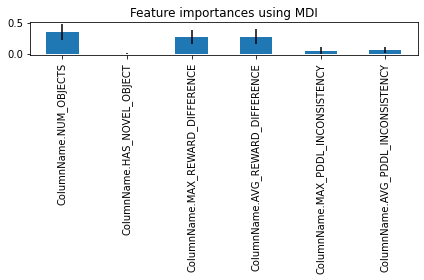

In [48]:
importances = rf3.feature_importances_
forest_importances = pandas.Series(importances, index=feature_cols)
std = numpy.std([tree.feature_importances_ for tree in rf3.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
#ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [59]:
import pickle
with open('/home/smohan/SAIL-ON/hydra/model/ensemble.pkl', 'wb') as f:
    pickle.dump(rf3, f)

In [24]:
dataframe_simple = pandas.read_csv("/home/smohan/SAIL-ON/hydra/data/science_birds/novelty_detection/ensemble_learning_simple_levels.csv")


X_simple = dataframe_simple[feature_cols]
y_simple = dataframe_simple['ColumnName.GROUND_TRUTH']
X_train_simple,X_test_simple,y_train_simple,y_test_simple=train_test_split(X_simple,y_simple,test_size=0.20)


logreg_simple = LogisticRegression()
logreg_simple.fit(X_train_simple,y_train_simple)
y_pred_simple_log=logreg_simple.predict(X_test_simple)
report_simple_log = classification_report(y_test_simple, y_pred_simple_log)
print(report_simple_log)

rf_simple = RandomForestClassifier(n_estimators=20)
rf_simple.fit(X_train_simple,y_train_simple)
y_pred_simple_rf=rf_simple.predict(X_test_simple)
report_simple_rf = classification_report(y_test_simple, y_pred_simple_rf)
print(report_simple_rf)

ab_simple = AdaBoostClassifier(n_estimators=20)
ab_simple.fit(X_train_simple,y_train_simple)
y_pred_simple_ab=ab_simple.predict(X_test_simple)
report_simple_ab = classification_report(y_test_simple, y_pred_simple_ab)
print(report_simple_ab)

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        37
           1       0.76      0.79      0.77        43

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        37
           1       0.79      0.77      0.78        43

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80

              precision    recall  f1-score   support

           0       0.67      0.81      0.73        37
           1       0.80      0.65      0.72        43

    accuracy                           0.73        80
   macro avg       0.73      0.73      0.72        80
weighted avg       0.74      0.72      0.72        80



In [38]:
threshold = 0.95

predicted = rf_simple.predict_proba(X_test_simple)
high_test =  (predicted[:,1] >= threshold).astype('int')

predicted_train =  rf_simple.predict_proba(X_train_simple)
high_train = (predicted_train[:,1] >= threshold).astype('int')


report_simple_rf = classification_report(y_test_simple,high_test)
print(report_simple_rf)

report_train_high = classification_report(y_train_simple, high_train)
print(report_train_high)

print(classification_report(y_train_simple, rf_simple.predict(X_train_simple)))

              precision    recall  f1-score   support

           0       0.52      1.00      0.69        37
           1       1.00      0.21      0.35        43

    accuracy                           0.57        80
   macro avg       0.76      0.60      0.52        80
weighted avg       0.78      0.57      0.50        80

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       163
           1       1.00      0.43      0.60       157

    accuracy                           0.72       320
   macro avg       0.82      0.71      0.69       320
weighted avg       0.82      0.72      0.69       320

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       163
           1       0.95      1.00      0.97       157

    accuracy                           0.97       320
   macro avg       0.97      0.97      0.97       320
weighted avg       0.97      0.97      0.97       320



#### May 2022

In [ ]:
dataframe = pandas.read_csv("/home/smohan/SAIL-ON/hydra/data/science_birds/novelty_detection/dataset_May2022/ensemble_learning_simple_levels_may2022.csv")
# feature_cols=['ColumnName.NUM_OBJECTS',
#     'ColumnName.HAS_NOVEL_OBJECT',
#  'ColumnName.MAX_REWARD_DIFFERENCE',
#  'ColumnName.AVG_REWARD_DIFFERENCE',
#  'ColumnName.MAX_PDDL_INCONSISTENCY',
#  'ColumnName.AVG_PDDL_INCONSISTENCY',
# 'ColumnName.PASS']

feature_cols=[
  'ColumnName.HAS_NOVEL_OBJECT'
 #'ColumnName.MAX_REWARD_DIFFERENCE',
 'ColumnName.AVG_REWARD_DIFFERENCE',
 #'ColumnName.MAX_PDDL_INCONSISTENCY',
 'ColumnName.AVG_PDDL_INCONSISTENCY',
 'ColumnName.PASS']



In [ ]:
dataframe.dtypes

In [ ]:
ax=seaborn.barplot(x='ColumnName.LEVEL_TYPE', y='ColumnName.PASS', data=dataframe)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [ ]:
seaborn.barplot(x='ColumnName.GROUND_TRUTH', y='ColumnName.PASS', data=dataframe)

In [ ]:
seaborn.barplot(x='ColumnName.GROUND_TRUTH', y='ColumnName.HAS_NOVEL_OBJECT', data=dataframe)

In [ ]:
seaborn.boxplot(x='ColumnName.GROUND_TRUTH', y='ColumnName.AVG_REWARD_DIFFERENCE', data=dataframe)

In [ ]:
seaborn.boxplot(x='ColumnName.GROUND_TRUTH', y='ColumnName.MAX_REWARD_DIFFERENCE', data=dataframe)

In [ ]:
seaborn.boxplot(x='ColumnName.GROUND_TRUTH', y='ColumnName.MAX_PDDL_INCONSISTENCY', data=dataframe)

In [ ]:
seaborn.boxplot(x='ColumnName.GROUND_TRUTH', y='ColumnName.AVG_PDDL_INCONSISTENCY', data=dataframe)

In [ ]:
seaborn.boxplot(x='ColumnName.GROUND_TRUTH', y='ColumnName.AVG_PDDL_INCONSISTENCY', hue='ColumnName.PASS', data=dataframe)

In [ ]:
seaborn.boxplot(x='ColumnName.GROUND_TRUTH', y='ColumnName.MAX_PDDL_INCONSISTENCY', hue='ColumnName.PASS', data=dataframe)

In [ ]:
seaborn.boxplot(x='ColumnName.GROUND_TRUTH', y='ColumnName.MAX_REWARD_DIFFERENCE', hue='ColumnName.PASS', data=dataframe)

In [ ]:
seaborn.boxplot(x='ColumnName.GROUND_TRUTH', y='ColumnName.AVG_REWARD_DIFFERENCE', hue='ColumnName.PASS', data=dataframe)

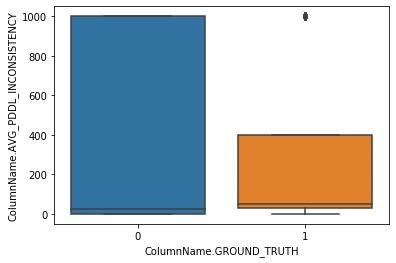

In [76]:
seaborn.boxplot(x='ColumnName.GROUND_TRUTH', y='ColumnName.AVG_PDDL_INCONSISTENCY', data=dataframe)

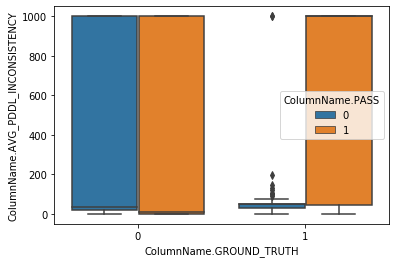

In [96]:
seaborn.boxplot(x='ColumnName.GROUND_TRUTH', y='ColumnName.AVG_PDDL_INCONSISTENCY', hue='ColumnName.PASS', data=dataframe)

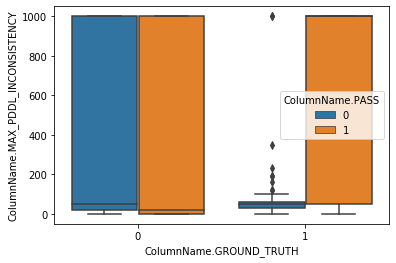

In [97]:
seaborn.boxplot(x='ColumnName.GROUND_TRUTH', y='ColumnName.MAX_PDDL_INCONSISTENCY', hue='ColumnName.PASS', data=dataframe)

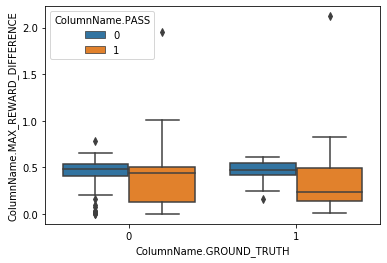

In [94]:
seaborn.boxplot(x='ColumnName.GROUND_TRUTH', y='ColumnName.MAX_REWARD_DIFFERENCE', hue='ColumnName.PASS', data=dataframe)

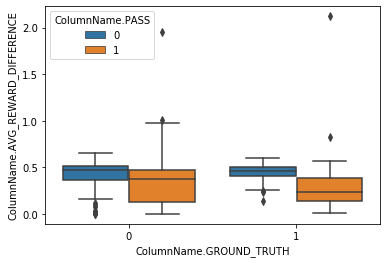

In [93]:
seaborn.boxplot(x='ColumnName.GROUND_TRUTH', y='ColumnName.AVG_REWARD_DIFFERENCE', hue='ColumnName.PASS', data=dataframe)

In [68]:
X2 = dataframe[feature_cols]
y2 = dataframe['ColumnName.GROUND_TRUTH']
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.10)

In [103]:
rf2 = RandomForestClassifier(n_estimators=20)
rf2.fit(X_train2,y_train2)
y_pred2_rf=rf2.predict(X_test2)
report2_rf = classification_report(y_test2, y_pred2_rf)
print(report2_rf)


threshold=0.95
predicted = rf2.predict_proba(X_test2)
high_test2 =  (predicted[:,1] >= threshold).astype('int')
report_high_rf = classification_report(y_test2,high_test2)
print(report_high_rf)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        47
           1       0.62      0.38      0.48        13

    accuracy                           0.82        60
   macro avg       0.74      0.66      0.68        60
weighted avg       0.80      0.82      0.80        60

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        47
           1       1.00      0.23      0.38        13

    accuracy                           0.83        60
   macro avg       0.91      0.62      0.64        60
weighted avg       0.86      0.83      0.79        60



In [99]:
logreg2 = LogisticRegression()
logreg2.fit(X_train2,y_train2)
y_pred2_log=logreg2.predict(X_test2)
report2_log = classification_report(y_test2, y_pred2_log)
print(report2_log)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        47
           1       1.00      0.08      0.14        13

    accuracy                           0.80        60
   macro avg       0.90      0.54      0.51        60
weighted avg       0.84      0.80      0.73        60



/home/smohan/anaconda3/envs/hydra/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
